In [2]:
!pip install transformers==4.31

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 354.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 657.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.6 kB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 50.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.2/785.2 kB 53.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.8 kB/s eta 0:00:0000:0100:04


In [3]:
import warnings
warnings.filterwarnings('ignore')

import transformers
transformers_version = transformers.__version__

if transformers_version > '4.31.1':
  !pip uninstall transformers
  !pip install transformers==4.31
else:
  print("transformers version:", transformers.__version__)

transformers version: 4.31.0


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Loading the Data ###

In [5]:
import pandas as pd

# Load the CSV file in memory
# train_path= '/content/drive/MyDrive/dataset/US_airline/Tweets.csv'
# train_path = '/content/drive/MyDrive/Tweets.csv'
train_path = 'Tweets.csv'

df = pd.read_csv(train_path, usecols=['text', 'airline_sentiment'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [7]:
class_mapping= ({'neutral':0, 'negative':1, 'positive': 2})
df['airline_sentiment'] = df['airline_sentiment'].map(class_mapping)

df= df.rename(columns={'airline_sentiment': 'label'})

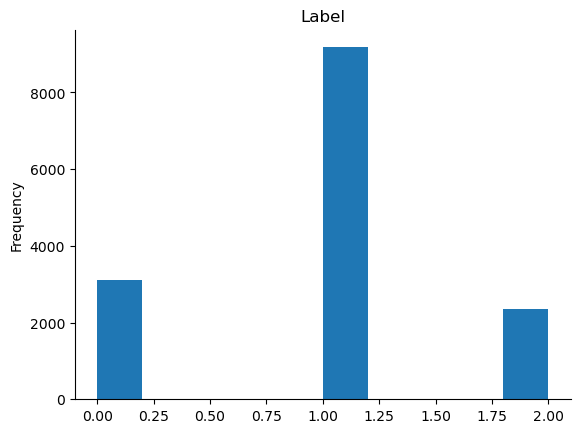

In [8]:
#import matplotlib library
from matplotlib import pyplot as plt

#Histogram of "Label" column in train datset
df['label'].plot(kind='hist', title='Label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# Print the first sample after cleaning data
df.iloc[0:5]

,label,text
0,0,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [78]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,test_size= 0.3, shuffle= True)

print('train_df shape:', train_df.shape)
print('test_df shape:', test_df.shape)

train_label_group= train_df['label'].value_counts()
test_label_group= test_df['label'].value_counts()

print('train_label_group:', train_label_group)
print('test_label_group:', test_label_group)

train_df shape: (10248, 2)
test_df shape: (4392, 2)
train_label_group: label
1    6428
0    2182
2    1638
Name: count, dtype: int64
test_label_group: label
1    2750
0     917
2     725
Name: count, dtype: int64


###Loading PreTrained BERT Model###

In [11]:
from transformers import AutoTokenizer, TFBertModel, BertConfig
tokenizer =  AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased')
embedding_dim = config.hidden_size

print(config)
print(f'embedding_dim : {embedding_dim}')

2024-05-05 18:24:10.838301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 18:24:10.838483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 18:24:11.100398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 18:24:11.597961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 18:24:14.293061: W tensorflow/compiler/tf2

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

2024-05-05 18:25:28.497797: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-05 18:25:28.519992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-05 18:25:28.520436: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

embedding_dim : 768


In [79]:
tokenizer(train_df['text'].iloc[0])

{'input_ids': [101, 1030, 2142, 10321, 6255, 2581, 2732, 4707, 2460, 4399, 1030, 9895, 10524, 11215, 6442, 2676, 2140, 2006, 2019, 6429, 12214, 2851, 1001, 6255, 2581, 1001, 20704, 18372, 2243, 8299, 1024, 1013, 1013, 1056, 1012, 2522, 1013, 27593, 17848, 6977, 11106, 2480, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [80]:
max_len = max([len(x.split()) for x in train_df.text])
print(f'Max len of tweets: {max_len}')

Max len of tweets: 36


In [81]:
x_train = tokenizer(
                text = train_df.text.tolist(),
                padding = True,
                max_length= 36,
                truncation= True,
                return_tensors = 'tf')

print(x_train)

{'input_ids': <tf.Tensor: shape=(10248, 36), dtype=int32, numpy=
array([[  101,  1030,  2142, ...,  1056,  1012,   102],
       [  101,  1030, 25988, ...,     0,     0,     0],
       [  101,  1030,  6892, ...,     0,     0,     0],
       ...,
       [  101,  1030, 25988, ...,     0,     0,     0],
       [  101,  1030, 25988, ...,  3335,  8029,   102],
       [  101,  1030, 25988, ...,  1012,   102,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(10248, 36), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(10248, 36), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0]], dtype=in

In [82]:
print(x_train['input_ids'].shape)
print(x_train['attention_mask'].shape)

(10248, 36)
(10248, 36)


In [83]:
y_train = train_df.label.values
y_train


array([2, 2, 0, ..., 1, 1, 1])

### Building the Model Architecture ###

In [96]:
import tensorflow as tf
from keras import layers, Model

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

max_length = 36

input_ids = layers.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
input_mask = layers.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

embeddings = bert(input_ids,attention_mask = input_mask)[1] #(0 is the last hidden states,1 means pooler_output)
reshaped_embeddings = tf.expand_dims(embeddings, axis=1)

LSTM_layer = layers.LSTM(units= 32, recurrent_dropout= 0.5)(reshaped_embeddings)
LSTM_layer = layers.Dense(32, activation='relu')(LSTM_layer)
LSTM_layer = layers.BatchNormalization()(LSTM_layer)
LSTM_layer = layers.Dropout(0.5)(LSTM_layer)

BiLSTM_layer = layers.Bidirectional(layers.LSTM(units=32, recurrent_dropout=0.5))(reshaped_embeddings)
BiLSTM_layer = layers.Dense(32, activation='relu')(BiLSTM_layer)
BiLSTM_layer = layers.BatchNormalization()(BiLSTM_layer)
BiLSTM_layer = layers.Dropout(0.5)(BiLSTM_layer)

GRU_layer = layers.GRU(units=32, recurrent_dropout=0.5, reset_after= True)(reshaped_embeddings)
GRU_layer = layers.Dense(32,activation = 'relu')(GRU_layer)
GRU_layer = layers.BatchNormalization()(GRU_layer)
GRU_layer = layers.Dropout(0.5)(GRU_layer)

concatenated = layers.Concatenate()([LSTM_layer, BiLSTM_layer, GRU_layer])

x = layers.Dense(128,activation = 'relu')(concatenated)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(64,activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

y = layers.Dense(3, activation = 'softmax')(x)

model = Model(inputs=[input_ids, input_mask], outputs=y)

# for layer in model.layers[:10]:
    # layer.trainable = False

model.layers[2].trainable = True

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [97]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 36)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 36)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 36, 76                                    

In [98]:
from keras.optimizers import Adam

optimizer = Adam(
    learning_rate = 6e-06, # this learning rate is for bert model, taken from huggingface website
    epsilon=1e-08,
    weight_decay=0.01)

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = 'sparse_categorical_crossentropy',
    metrics = ["sparse_categorical_accuracy"])

In [99]:
train_history = model.fit(
    x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_split = 0.15,
    epochs= 25,
    batch_size= 32)

Epoch 1/25
273/273 [==============================] - 95s 172ms/step - loss: 1.2835 - sparse_categorical_accuracy: 0.4964 - val_loss: 1.1141 - val_sparse_categorical_accuracy: 0.3674
Epoch 2/25
273/273 [==============================] - 36s 133ms/step - loss: 0.8802 - sparse_categorical_accuracy: 0.6379 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.9558
Epoch 3/25
273/273 [==============================] - 37s 135ms/step - loss: 0.7337 - sparse_categorical_accuracy: 0.7022 - val_loss: 0.2233 - val_sparse_categorical_accuracy: 0.9688
Epoch 4/25
273/273 [==============================] - 36s 132ms/step - loss: 0.6198 - sparse_categorical_accuracy: 0.7513 - val_loss: 0.2570 - val_sparse_categorical_accuracy: 0.9694
Epoch 5/25
273/273 [==============================] - 36s 131ms/step - loss: 0.5591 - sparse_categorical_accuracy: 0.7808 - val_loss: 0.1998 - val_sparse_categorical_accuracy: 0.9701
Epoch 6/25
273/273 [==============================] - 36s 132ms/step - loss: 0.4968 -

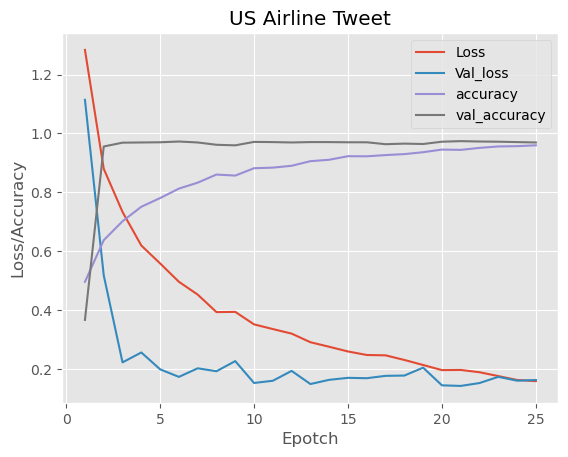

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Set the plot style to 'ggplot'
plt.style.use('ggplot')

# Extract loss and accuracy values from the history object
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
accuracy = train_history.history['sparse_categorical_accuracy']
val_accuracy = train_history.history['val_sparse_categorical_accuracy']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label= 'Val_loss')

# Plot the training and validation accuracy
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label= 'val_accuracy')

# Add legend, labels, and title to the plot
plt.legend()
plt.xlabel('Epotch')
plt.ylabel('Loss/Accuracy')
plt.title('US Airline Tweet')

# Display the plot
plt.show()

#### TESTING PHASE
on this phase we will make predictions out of our model

In [107]:
x_test = tokenizer(
    text = test_df.text.tolist(),
    padding= True,
    max_length= 36,
    truncation = True,
    return_tensors= 'tf')

In [108]:
y_test = test_df.label.values
y_test

array([2, 1, 0, ..., 1, 1, 1])

In [109]:
predicted = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

138/138 [==============================] - 7s 47ms/step


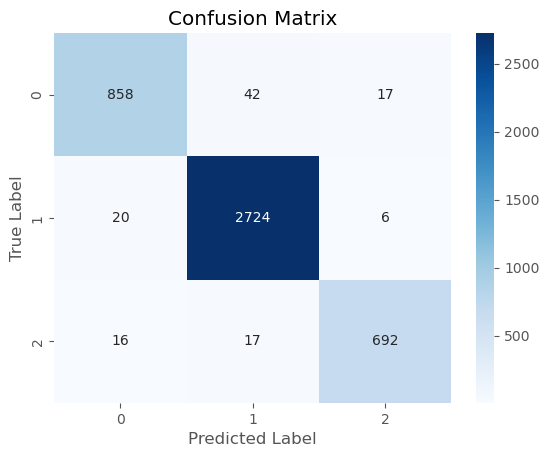

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert the predictions to class labels (0, 1, or 2 for 3 classes)
y_pred_classes = np.argmax(predicted, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_df['label'], y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [111]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_df['label'], y_pred_classes)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       917
           1       0.98      0.99      0.98      2750
           2       0.97      0.95      0.96       725

    accuracy                           0.97      4392
   macro avg       0.97      0.96      0.96      4392
weighted avg       0.97      0.97      0.97      4392

